In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("Data/CC.csv")

In [3]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Calculate the proportion of each class

target = df.values[:,-1]
counter = Counter(target)
for a, b in counter.items():
    per = b / len(target) * 100
    print ('Class=%d, Count=%d, Percentage=%.2f%%' % (a,b, per))


Class=0, Count=284315, Percentage=99.83%
Class=1, Count=492, Percentage=0.17%


In [5]:
df= df.drop(['Unnamed: 0'], axis=1)

In [6]:
print("missing values:", df.isnull().values.any())

missing values: False


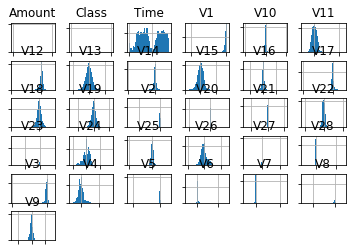

In [7]:
#create histograms for all Vnth columns

ax = df.hist(bins=150)

#Remove the axes name to prevent cluttering 

for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    
plt.show()

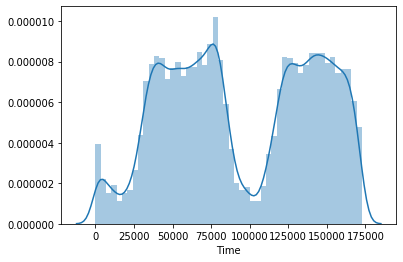

In [8]:
sns.distplot(df.Time)

In [9]:
features = [col for col in df.columns if 'Class' not in col]

/Users/fondairenasantoso/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/fondairenasantoso/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


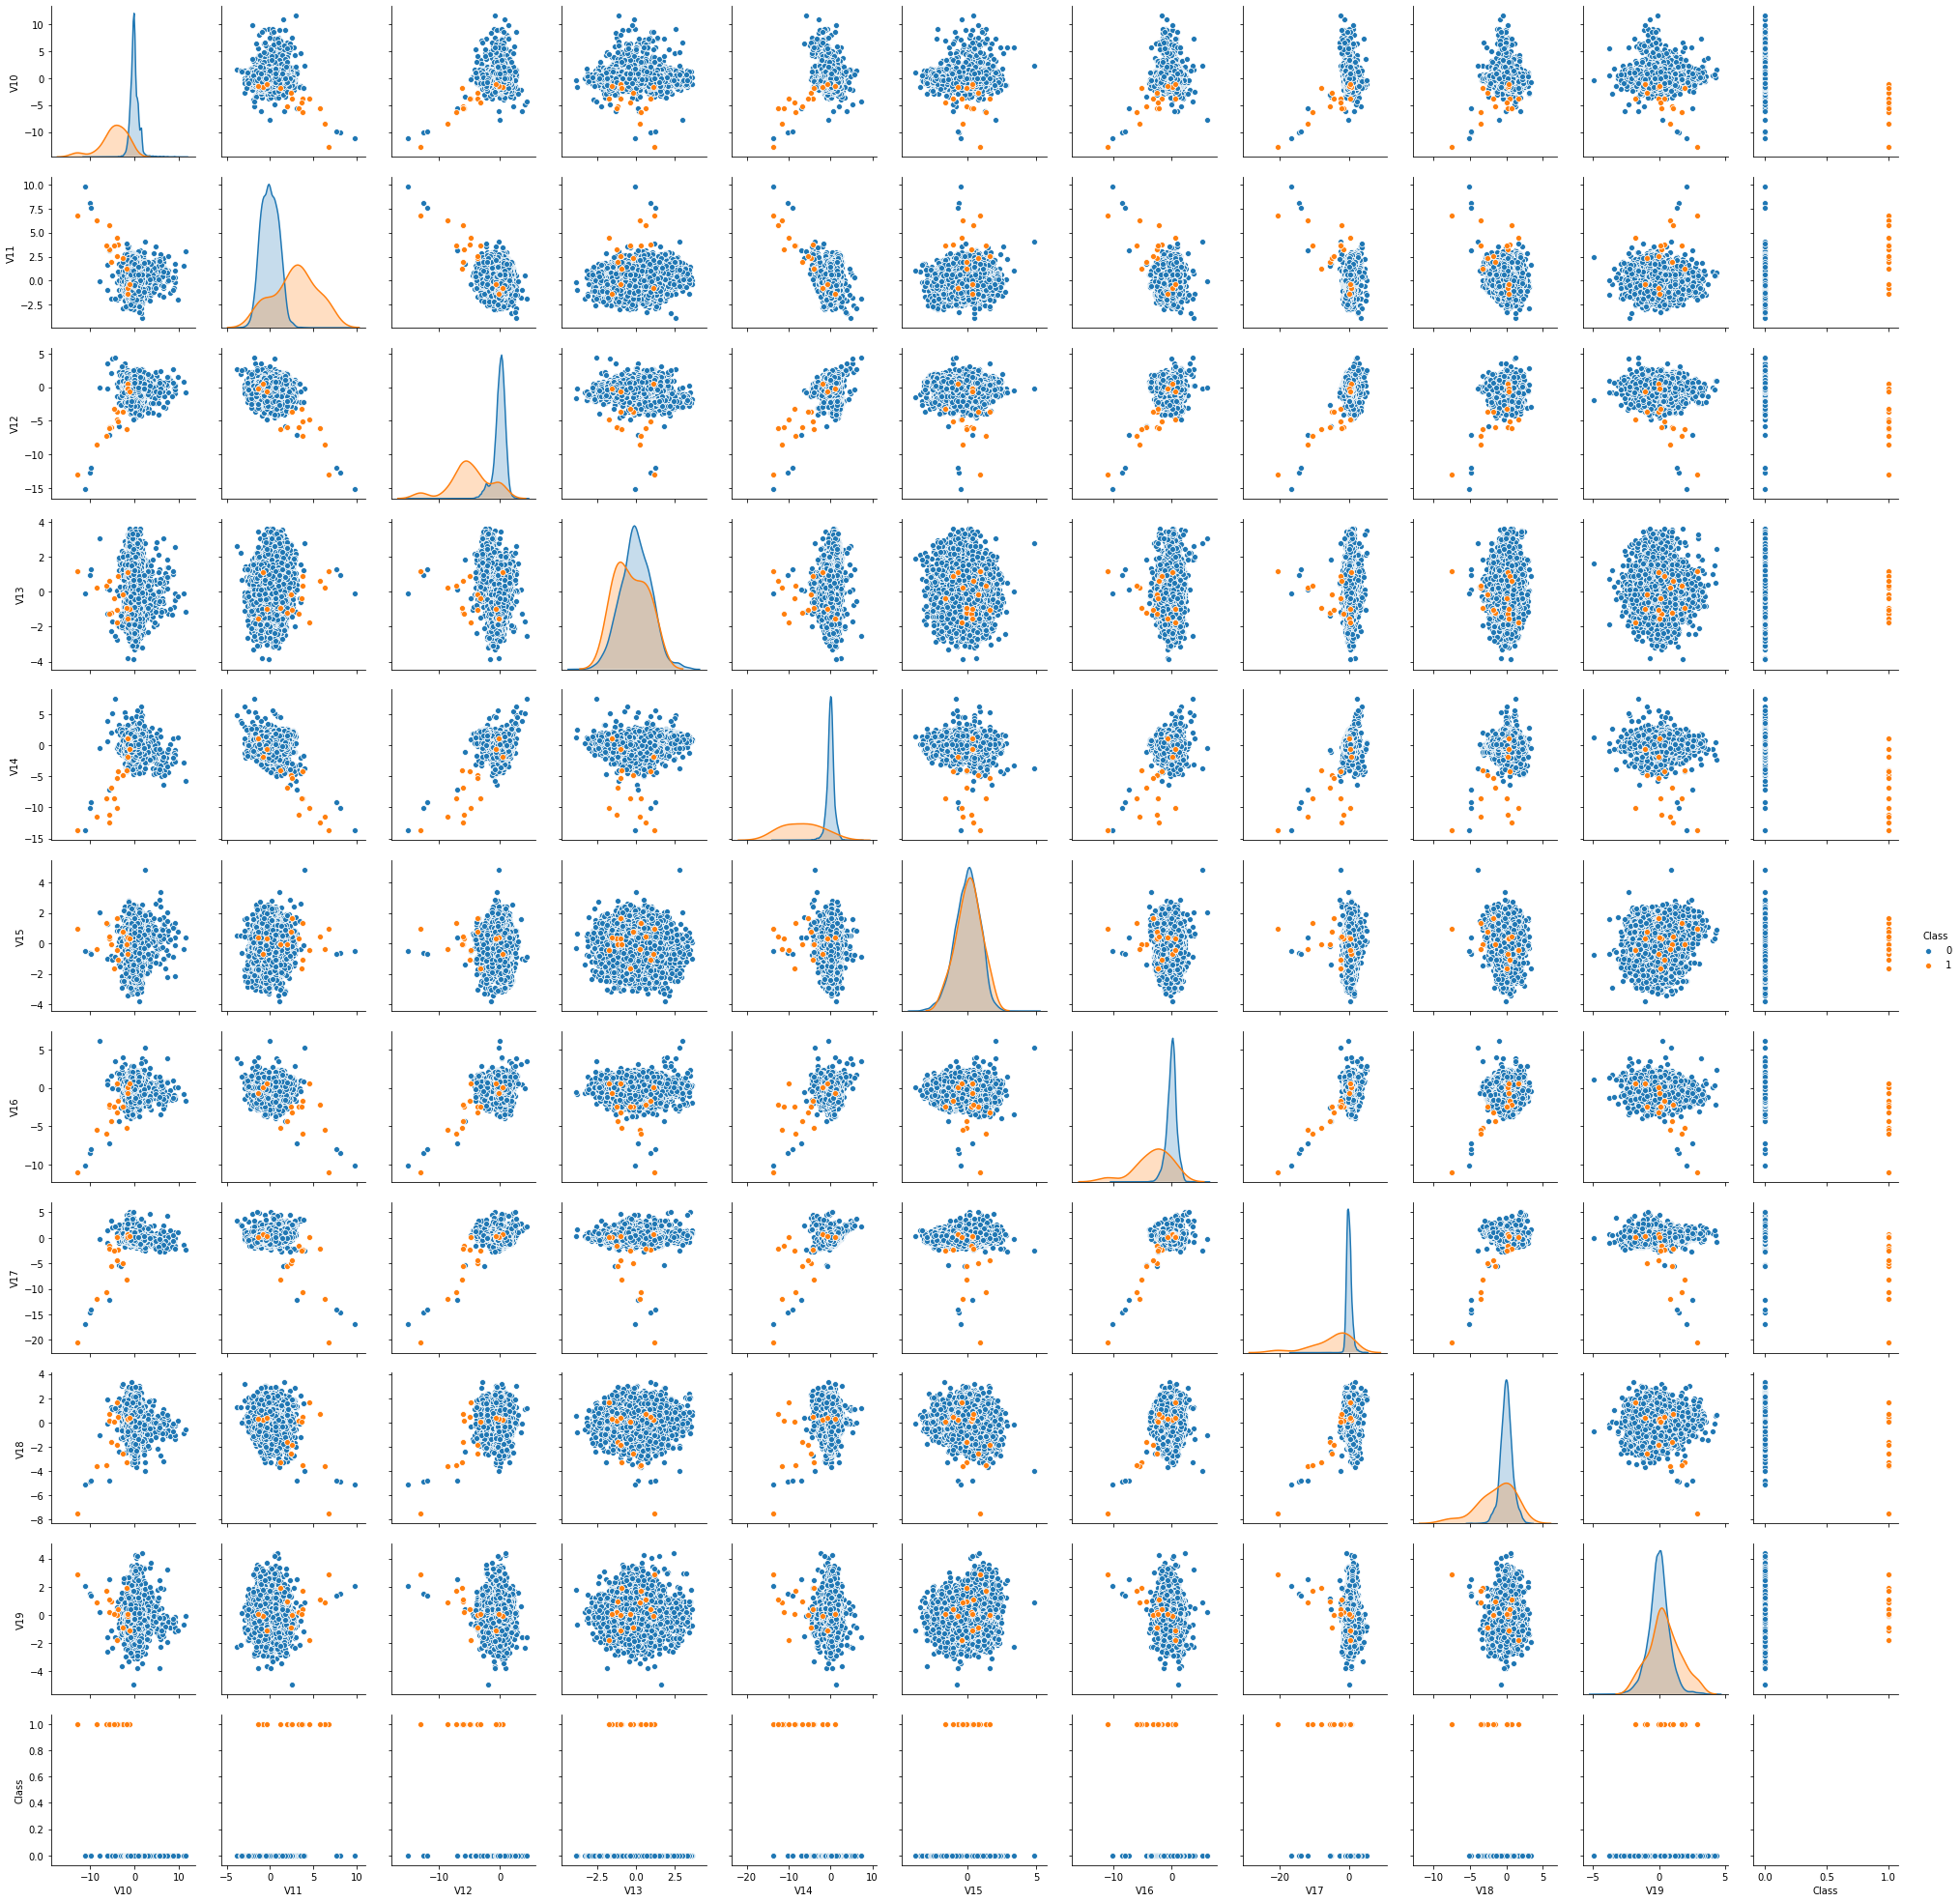

In [10]:
sns.pairplot(df[features[10:20]+['Class']].sample(10000,random_state=1),hue='Class')

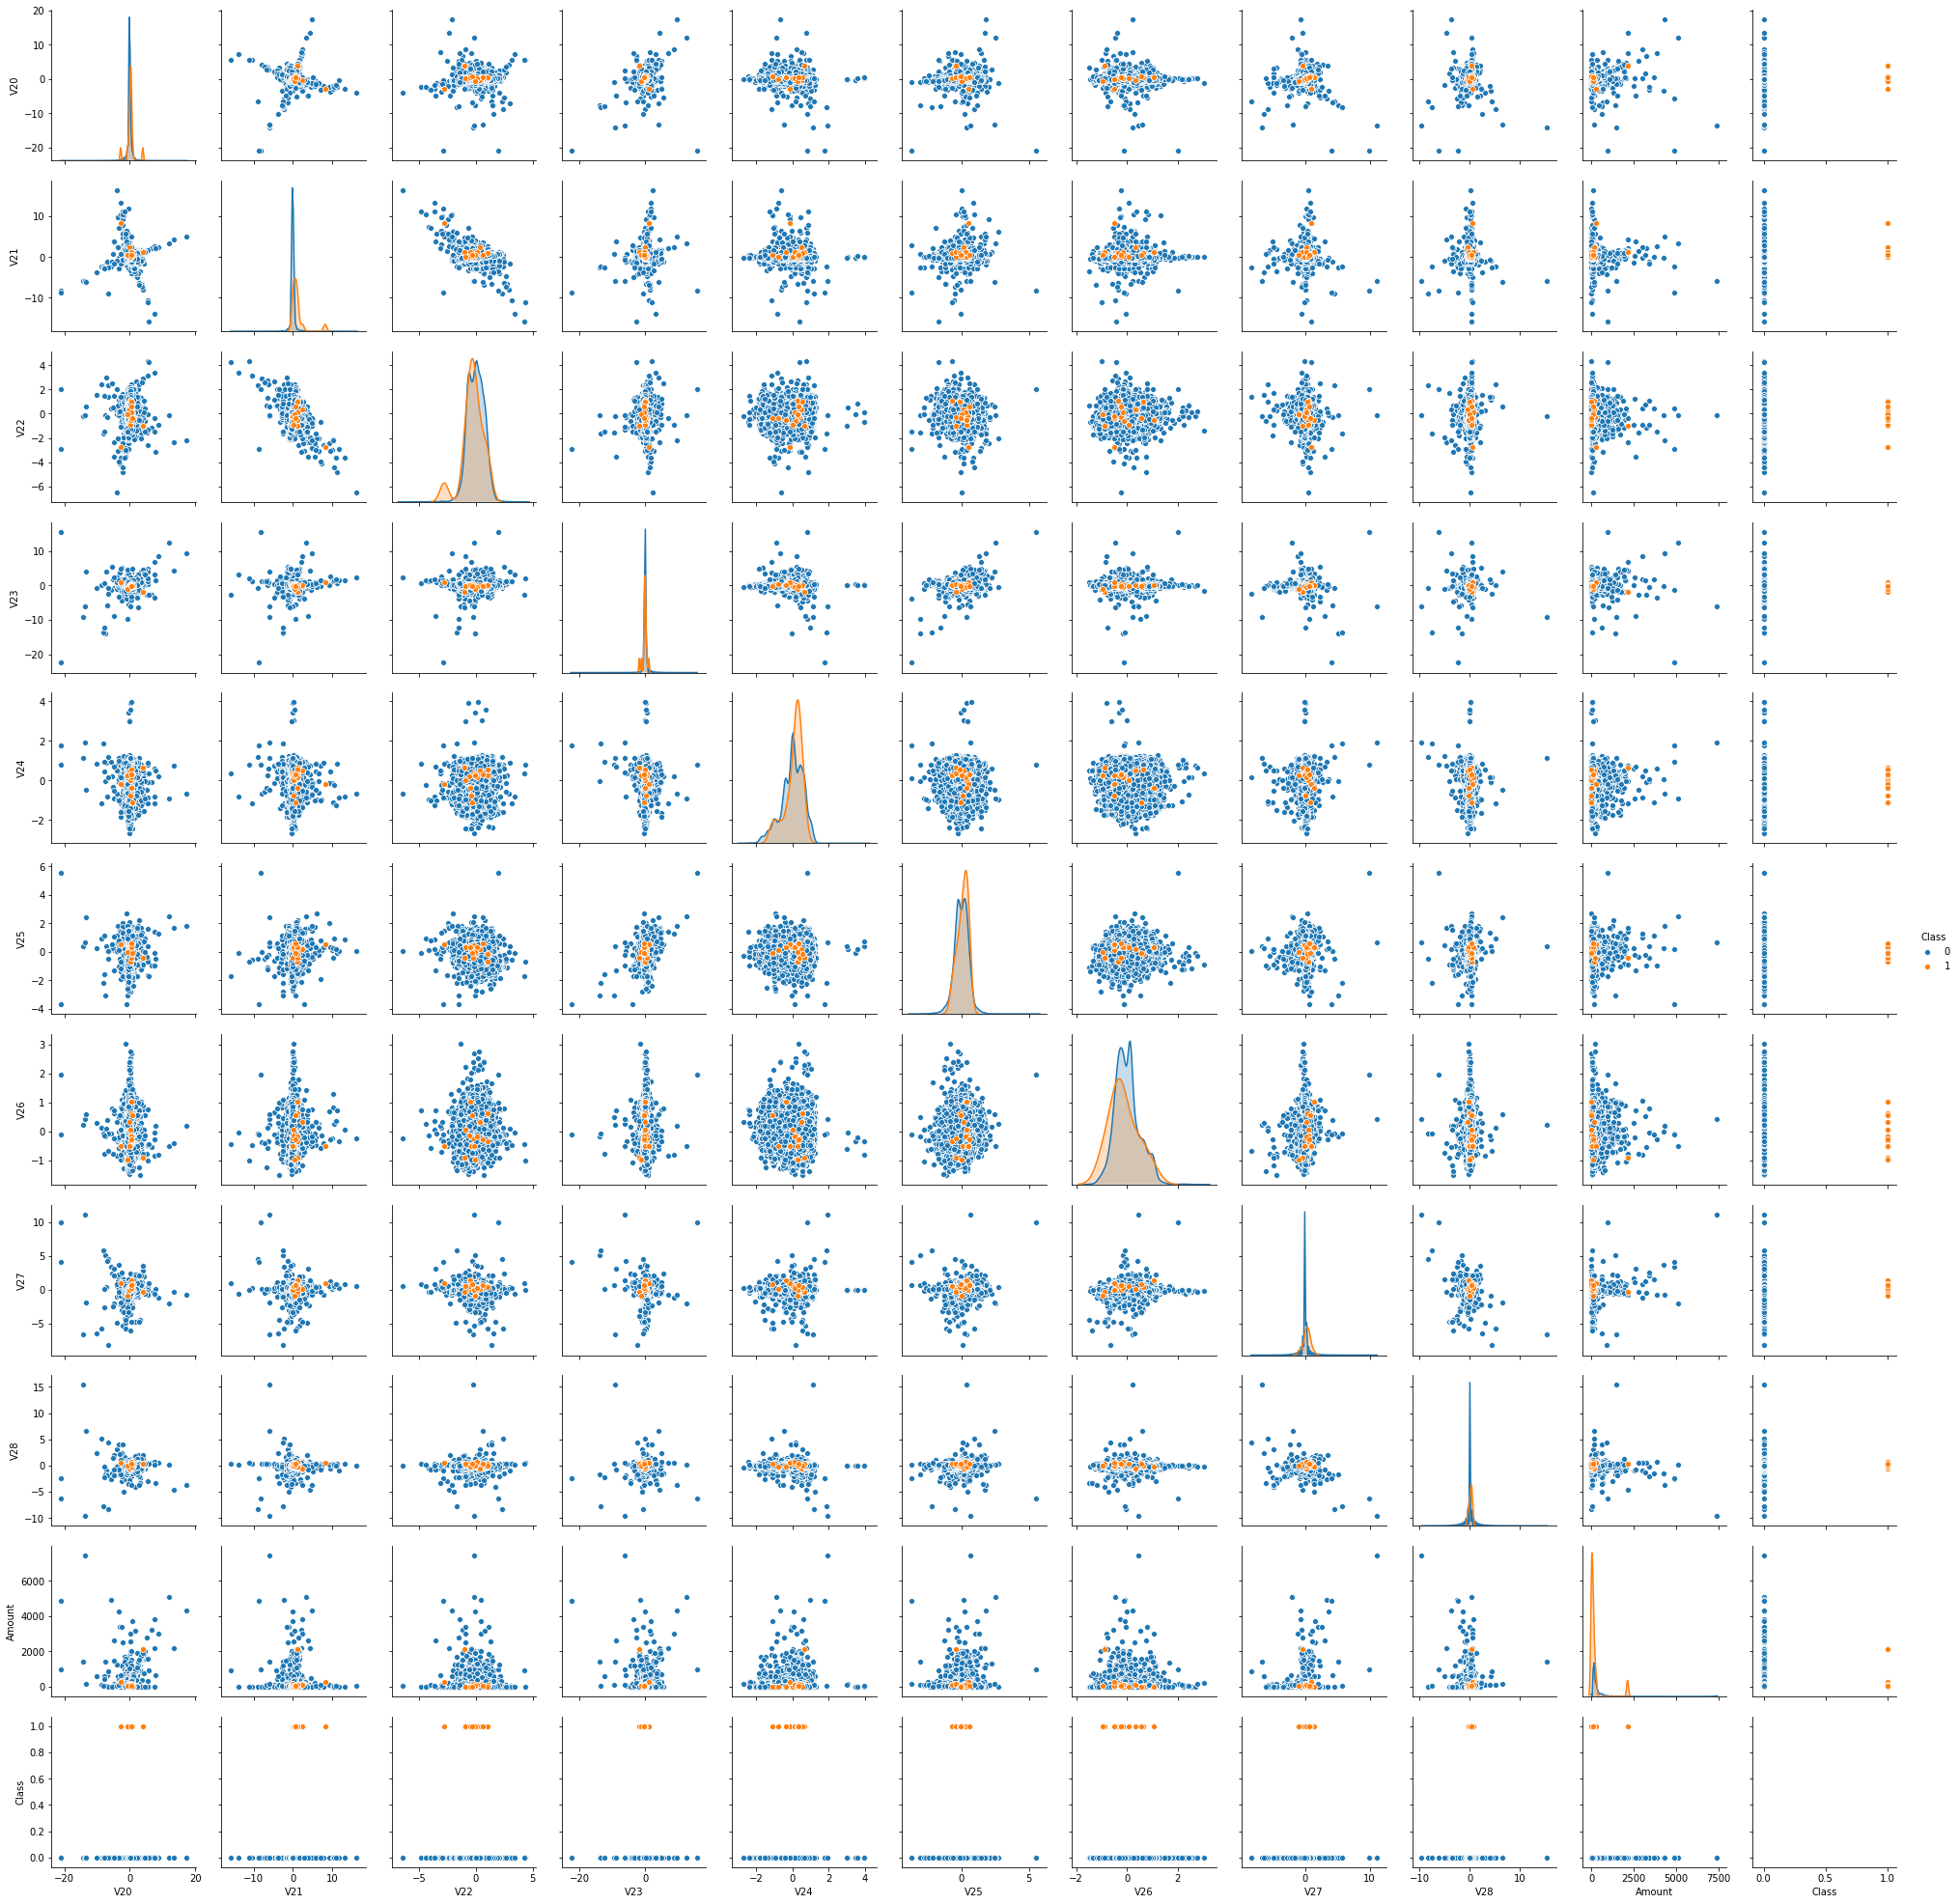

In [11]:
sns.pairplot(df[features[20:]+['Class']].sample(10000,random_state=1),hue='Class')

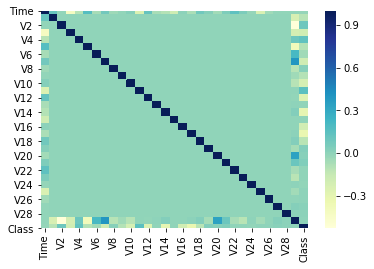

In [12]:
#Distribution of the transaction

sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()


#### In order to best identify features in the dataset and build an accurate model, we need to normalize all the columns, which will prevent the model from having skewed and/or biased results


In [16]:
df2 = df.copy()
scaler = MinMaxScaler()
scaler.fit(df2['Time'].values.reshape(-1,1))
df2['Time'] = scaler.fit_transform(df2['Time'].values.reshape(-1,1))
scaler.fit(df2['Amount'].values.reshape(-1,1))
df2['Amount']= scaler.fit_transform(df2['Amount'].values.reshape(-1,1))

In [17]:
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0


### Model-Training

In [18]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [20]:
features = [col for col in df2.columns if 'Class' not in col]
target = df2['Class']
X = df2[features]
y = target.to_numpy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1, test_size=0.6)

## Modeling

#### we'll try to use several different algo to see which one yields the best result

#### Random Forest Model

In [22]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)

/Users/fondairenasantoso/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
#Evaluation Matrix

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ("The accuracy score is {}".format(acc))
print ("The precision score is {}".format(precision))
print ("The recall score is {}".format(recall))
print ("The f1 score is {}".format(f1))

The accuracy score is 0.9994382186850806
The precision score is 0.9292035398230089
The recall score is 0.7241379310344828
The f1 score is 0.813953488372093


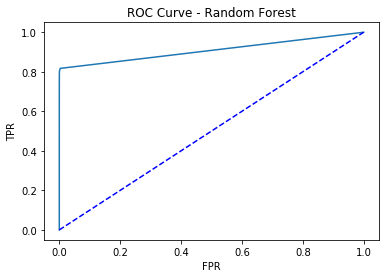

Area Under The Curve =  0.908261520782737


In [24]:
from sklearn.metrics import roc_curve, auc

y_score_rfc = model_rfc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_rfc)

title('ROC Curve - Random Forest')
xlabel('FPR')
ylabel('TPR')

plot(fpr, tpr)
plot((0,1), ls = 'dashed', color='blue')
plt.show()
print('Area Under The Curve = ', auc(fpr,tpr))

#### Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)

/Users/fondairenasantoso/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
print("accuracy on the training set is",lr.score(X_train, y_train))
print("accuracy on the testing set is",lr.score(X_test, y_test))

accuracy on the training set is 0.9992714313302083
accuracy on the testing set is 0.999163179916318


#### Confusion Matrix 

In [27]:
cm = confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170595
           1       0.85      0.61      0.71       290

    accuracy                           1.00    170885
   macro avg       0.93      0.81      0.86    170885
weighted avg       1.00      1.00      1.00    170885



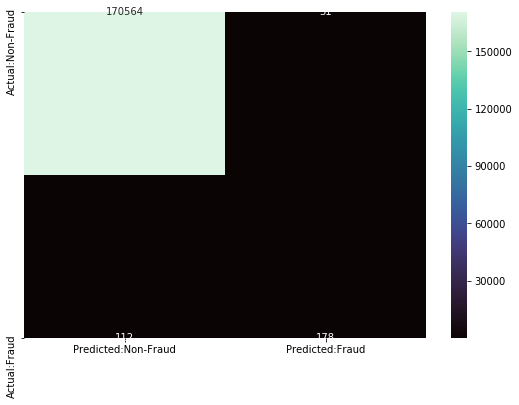

In [28]:
conf_matrix = pd.DataFrame(data = cm, columns=['Predicted:Non-Fraud','Predicted:Fraud'], index=['Actual:Non-Fraud','Actual:Fraud'])
plt.figure(figsize = (9,6))
sns.heatmap(conf_matrix, annot=True, fmt ='d', cmap="mako");

#### Cross Validation

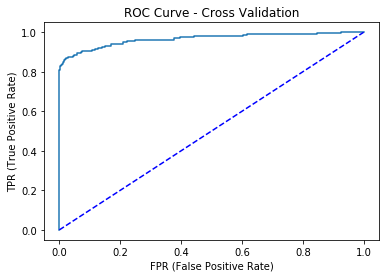

Area Under The Curve: 0.965721516275187


In [29]:
from sklearn.metrics import roc_curve, auc

y_score = lr.predict_proba(X_test,)[:,1]

#FPR = False Positive Rate #TPR = True Positive Rate

fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC Curve - Cross Validation')
xlabel ('FPR (False Positive Rate)')
ylabel('TPR (True Positive Rate)')

plot(fpr, tpr)
plot((0,1), ls = 'dashed', color='blue')
plt.show()

print ("Area Under The Curve:", auc(fpr,tpr))

#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_svc = SVC()
attr={'C': [0.1, 1, 2, 5, 10, 25, 50, 100],
      'gamma': [1e-1, 1e-2, 1e-3]
     }

svc_classi= GridSearchCV(model_svc, attr, cv=5)
svc_classi_fit = svc_classi.fit(X_train, y_train)
y_pred_svc = svc_classi_fit.predict(X_test)
print("Accuracy of SVC:",accuracy_score(y_pred_svc, y_test))
print(classification_report(y_test, y_pred_svc))

In [ ]:
y_score_svc = y_pred_svc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_svc)

title('ROC Curve - Random Forest')
xlabel('FPR')
ylabel('TPR')

plot(fpr, tpr)
plot((0,1), ls = 'dashed', color='blue')
plt.show()
print('Area Under The Curve = ', auc(fpr,tpr))